# Lab 10: Determining Heat Capacity of a Metal with Dulong/Petit Law

In this lab you will determine the heat capacity of two different metals. You will need to set up three text files of your collected data to use this code. There are some text files with values to get you started, but you need to replace these values with those you measured and recorded during lab. This python script will read in the time and temperature data from three files: 1. All the time and temperature data that you collected should be listed in 'LAB_10.HeatCapacity_time_temperature.txt', which will be plotted as individual data points, 2. All the time and temperature data from before the metal is added that we will fit to a line in 'LAB_10.HeatCapacity_fit_before_time_temperature.txt', 3. All the time and temperature data after you add the metal and temperature reaches the maximum value (you might have to remove a couple data points before this maximim) that will be fit to a line in 'LAB_10.HeatCapacity_fit_after_time_temperature.txt'.  

The goal of the data analysis is to determine a precise change in temperature of the water upon the addition of the metal. This is done by precisely determining the temperature before, and then extrapolating to a precise temperature for when the metal has transferred its heat to the water. The extrapolation is necessary because some heat is lost to the container and the surrounding room before an accurate measurement can be taken.  

First we will import the necessary libraries from python. 

In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

Next we will set up some empty arrays that will be populated with your data. 

In [2]:

print("\n HEAT CAPACITY of METAL and DULONG/PETIT LAW PLOT \n")

# Set up empty arrays that we will populate 
measured_time = []  # This is for the raw data 
measured_temperature = [] 
before_time = []  # This is the data before adding the metal that we will fit
before_temperature = [] 
after_time = [] # This is the data after adding the metal (starting at the maximum temp) that we will fit
after_temperature = [] 


 HEAT CAPACITY of METAL and DULONG/PETIT LAW PLOT 



Next we will read in the text file of the measured data points and load the values into our arrays.  This code is set up to read data that is tab delimited ('\t'), but you can change this to be space or comma delimited if that is how you put your data in the text file. 

In [3]:
# Read in the data from the text file of the measured time and temperature data, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
# The code below uses tab (\t) as the delimiter (separation) between values. You can change this to space delimiter as necessary. 
HeatCapacity_file = ('LAB_10.HeatCapacity_time_temperature.txt')  
values = numpy.genfromtxt(fname=HeatCapacity_file, skip_header=1, delimiter='\t', dtype='unicode')
#print(values)

for i in range(0, len(values)):
    measured_time.append(float(values[i,0])); 
    measured_temperature.append(float(values[i,1])); 

Now set up the graph of the measured data. 


Plotting the measured data as points... 



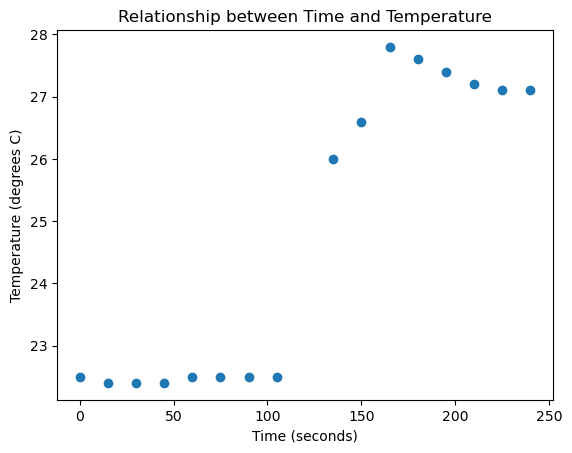

In [4]:
print("\nPlotting the measured data as points... \n")
# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(measured_time, measured_temperature, 'o', label='measured data')

Look at your data in the plot. Does it show all of your measured data? Does it seem reasonable? You will be creating two best fit lines to two different parts of the data. There should be flat region in the time before you add the metal for the first best fit line, then, after you added your metal, there should be a line of decreasing values after the maximum value.  The data that you want to fit to a line should be in your other two files. The next step will be reading in the data from before adding the metal; it should be in 'LAB_10.HeatCapacity_fit_before_time_temperature.txt'

In [5]:
print("\nNow read in the data from before adding the metal and determine a best fit line... \n")
HeatCapacity_before_file = ('LAB_10.HeatCapacity_fit_before_time_temperature.txt')  
values = numpy.genfromtxt(fname=HeatCapacity_before_file, skip_header=1, delimiter='\t', dtype='unicode')

for i in range(0, len(values)):
    before_time.append(float(values[i,0])); 
    before_temperature.append(float(values[i,1])); 


Now read in the data from before adding the metal and determine a best fit line... 



Next is using linear regression of that data to create a best fit line. The linear regression in the stats package is used and it will generate an intercept, slope, and rvalue. We can use the slope and the intercept to determine the extrapolated temperature value at Time = 120 s. We can also store the R**2 value and the equation as text to print on our graph later. 

In [6]:
# Use linear regression to determine the best fit line
fit = stats.linregress(before_time, before_temperature)
print(f"R-squared: {fit.rvalue**2:.6f}")
print(f"Slope: {fit.slope:.6e}")
print(f"Extrapolated temperature value for 120 seconds: {fit.slope * 120 + fit.intercept:.6f}")
#print(f"intercept: {fit.intercept:.6e}")
Before_temp = fit.slope * 120 + fit.intercept
Before_R_text = f"R^2 = {fit.rvalue**2:.4f}"
Before_eqn_text = f"y = {fit.slope:.4e} x + {fit.intercept:.4f}"

R-squared: 0.257143
Slope: 7.142857e-04
Extrapolated temperature value for 120 seconds: 22.510714


The value of the slope should be very, very small, since this data should be fairly constant, creating a flat line. Next, use the equation of the best fit line to determine the y values that go with the time values. Then use these values in the plot. 

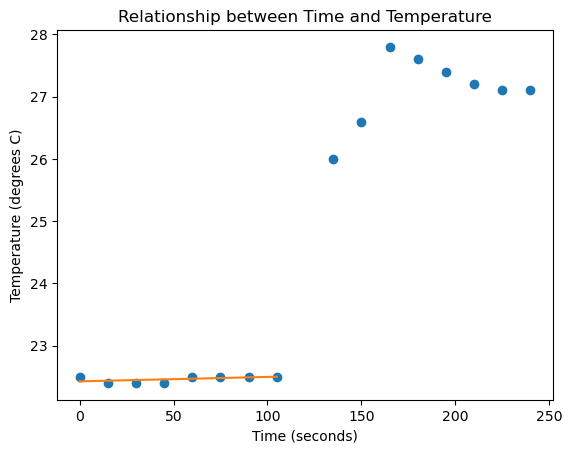

In [8]:
# Plot your fit line
# Use slope and intercept from the fit to determine the fitted values for the plot
fit_before_temp = []
for value in before_time:
    fit_before_temp.append(fit.slope * value + fit.intercept)

plt.figure()
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(measured_time, measured_temperature, 'o', label='measured data')
plt.plot(before_time,fit_before_temp, '-', label='best fit line for data before adding metal')

Look at your best fit line - does it fit your first set of measured values? Does it look like a flat line? 

Next will be reading in the next set of data, starting at the maximum temperature, from after the metal is added, in 'LAB_10.HeatCapacity_fit_after_time_temperature.txt'. Then again use linear regression to fit that data. Using the equation of the line, determine the temperature at 120 seconds with extrapolation. 

In [10]:
print("\nNow read in the data from after adding the metal and determine a best fit line... \n")
HeatCapacity_after_file = ('LAB_10.HeatCapacity_fit_after_time_temperature.txt')  
values = numpy.genfromtxt(fname=HeatCapacity_after_file, skip_header=1, delimiter='\t', dtype='unicode')

for i in range(0, len(values)):
    after_time.append(float(values[i,0])); 
    after_temperature.append(float(values[i,1])); 

# Use linear regression to determine the best fit line
fit = stats.linregress(after_time, after_temperature)
print(f"R-squared: {fit.rvalue**2:.6f}")
print(f"Slope: {fit.slope:.6e}")
print(f"Extrapolated temperature value for 120 seconds: {fit.slope * 120 + fit.intercept:.6f}")
#print(f"intercept: {fit.intercept:.6e}")
After_temp = fit.slope * 120 + fit.intercept
After_R_text = f"R^2 = {fit.rvalue**2:.4f}"
After_eqn_text = f"y = {fit.slope:.4e} x + {fit.intercept:.4f}"


Now read in the data from after adding the metal and determine a best fit line... 

R-squared: 0.934562
Slope: -9.904762e-03
Extrapolated temperature value for 120 seconds: 28.183810


Now, use the two extrapolated values to compute the change in temperature:


In [11]:
# Determine change in temp
print(f"\nChange in temperature (degrees C) from fits:  {After_temp - Before_temp:.6f}")


Change in temperature (degrees C) from fits:  5.673095


You now have your delta T, but you need to create a plot of your best fit line. Use the equation of the best fit line to set up the fitted data. 

In [14]:

# Plot your the fit line
# Use slope from the fit to determine the fitted values for the plot
fit_after_temp = []
for value in after_time:
    fit_after_temp.append(fit.slope * value + fit.intercept)

Add this best fit line to the plot, along with the legend and the equations for the best fit lines. Place them next to the best fit lines and save the figure. 

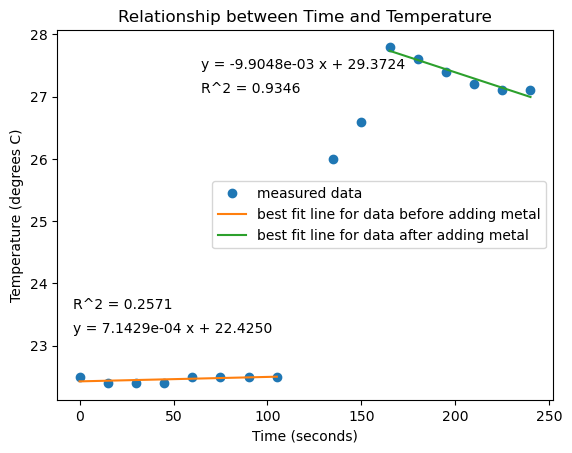

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure()
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(measured_time, measured_temperature, 'o', label='measured data')
plt.plot(before_time,fit_before_temp, '-', label='best fit line for data before adding metal')
plt.plot(after_time,fit_after_temp, '-', label='best fit line for data after adding metal')


plt.legend()
#adding text inside the plot
plt.figtext(0.15, 0.25, Before_eqn_text)
plt.figtext(0.15, 0.3, Before_R_text)
plt.figtext(0.35, 0.8, After_eqn_text)
plt.figtext(0.35, 0.75, After_R_text)
plt.show()
plt.savefig('LAB_10.HeatCapacity.png')


